In [1]:
run ../src/hearthstone_eda.py

/Users/nicolasjacobsohn/Galvanize/Capstones/Capstone1/Hearthstone-Data-Analysis/src/hearthstone_eda.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  json_data['health'][i] = json_data['durability'][i]
/Users/nicolasjacobsohn/Galvanize/Capstones/Capstone1/Hearthstone-Data-Analysis/src/hearthstone_eda.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ranked_decks_2014['month'] = ranked_decks_2014['date'].map(lambda x: x.month)
/Users/nicolasjacobsohn/Galvanize/Capstones/Capstone1/Hearthstone-Data-Analysis/src/hearthstone_eda.py:141: SettingWithCopyWarning: 
A value is trying to be set on a 

In [2]:
import matplotlib.pyplot as plt

In [3]:
class_names = list(ranked_decks['deck_class'].unique())

In [4]:
plt.style.use('ggplot')

In [5]:
font = {'family' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

In [6]:
class_colors = {
        'Druid' : 'limegreen',
        'Paladin' : 'gold',
        'Mage' : 'cornflowerblue',
        'Warlock' : 'mediumpurple',
        'Warrior' : 'maroon',
        'Shaman' : 'teal',
        'Rogue' : 'grey',
        'Priest' : 'ivory',
        'Hunter' : 'darkgreen',
        'Neutral' : 'black'
    }

In [7]:
deck_set_event_list = [#'Beta Release', 'Beta Patch 3664', 'Beta Patch 3749', 'Beta Patch 3937',
                       #'Beta Patch 4217', 'Beta Patch 4243', 'Beta Patch 4482', 'Beta Patch 4944',
                       #'Live Patch 4973', 'Live Patch 5170', 'Live Patch 5435', 
                       'Live Patch 5506',
                       'Naxx Launch', 'GvG Prelaunch', 'GvG Launch', 'Undertaker Nerf', 
                       'Blackrock Launch', 'TGT Launch', 'Warsong Nerf', 'Explorers', 
                       'Classic Nerfs', 'Old Gods', 'Karazhan', 'Yogg Nerf',
                       'Gadgetzan', 'Aggro Downfall'
                      ]

In [8]:
#fig, ax = plt.subplots(figsize=(10, 6))
#ax.hist((ranked_decks_2014[ranked_decks_2014['deck_class'] == 'Mage'].count()['date']))

In [9]:
#fig, ax = plt.subplots(figsize=(10, 6))

#ax.plot(class_names, ranked_decks_2014.groupby('deck_class').agg({'deck_class' : 'count'}))
#ax.plot(class_names, ranked_decks_2015.groupby('deck_class').agg({'deck_class' : 'count'}))
#ax.plot(class_names, ranked_decks_2016.groupby('deck_class').agg({'deck_class' : 'count'}))
#ax.plot(class_names, ranked_decks_2017.groupby('deck_class').agg({'deck_class' : 'count'}))

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


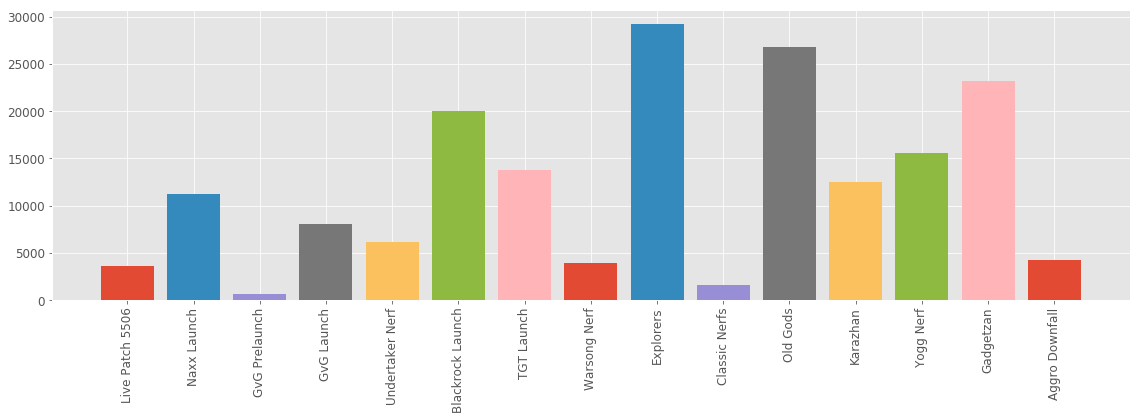

In [10]:
fig, ax = plt.subplots(figsize=(16,6))
for patch in deck_set_event_list:
    ax.bar(patch, ranked_decks[ranked_decks['deck_set'] == patch].count()['date'])
    ax.set_xticks(np.arange(0, len(deck_set_event_list)))
    ax.set_xticklabels(deck_set_event_list, rotation=90)
    
plt.tight_layout()
plt.savefig("../img/decks_per_patch.png")

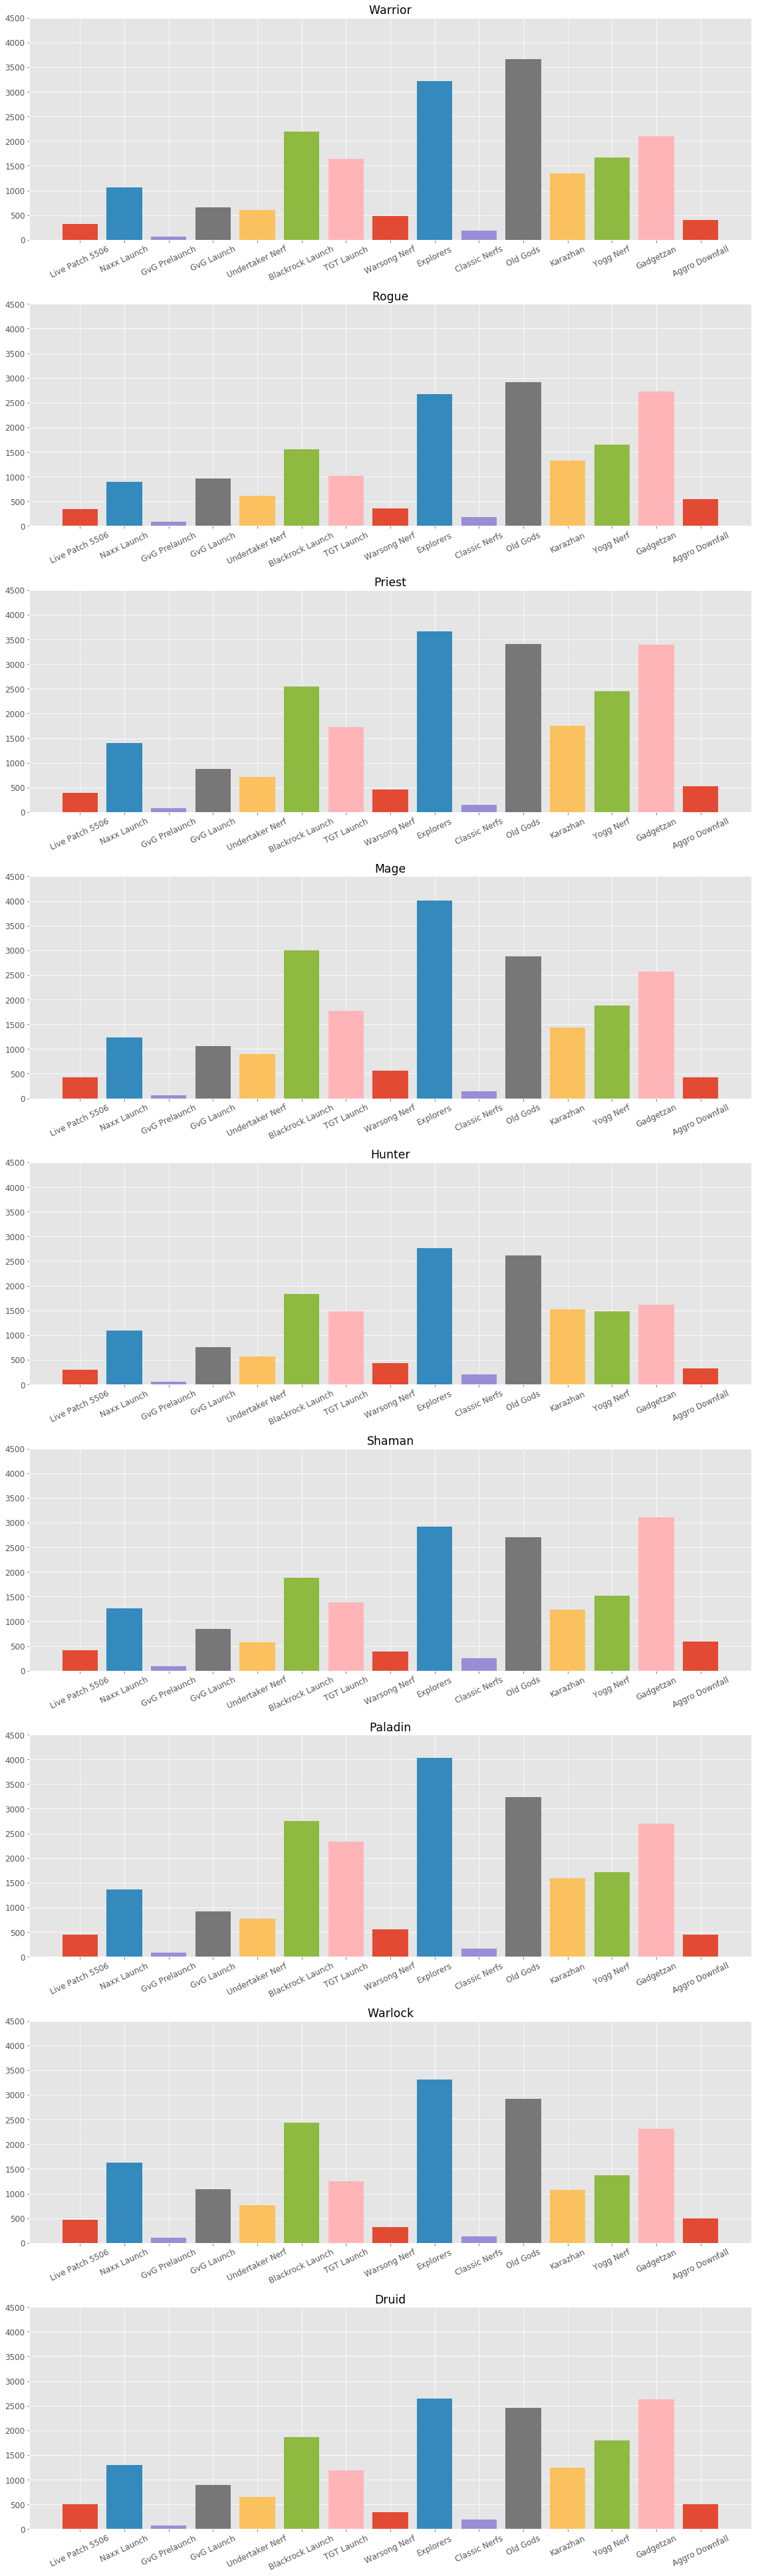

In [11]:
fig, axs = plt.subplots(9, 1, figsize=(16,54))
for idx, ax in enumerate(axs.flatten()):
    for patch in deck_set_event_list:
        deck_condit = ranked_decks['deck_class'] == class_names[idx]
        patch_condit = ranked_decks['deck_set'] == patch
        ax.bar(patch, height=ranked_decks[deck_condit & patch_condit].count()['date'])
        ax.set_xticks(np.arange(0, len(deck_set_event_list)))
        ax.set_xticklabels(deck_set_event_list, rotation=25)
        ax.set_title(class_names[idx])
        ax.set_ylim(0, 4500)
plt.tight_layout()
plt.savefig("../img/class_pop_per_patch.png")

In [12]:
class_pop_ls = []
for cls in class_names:
    cls_ls = []
    class_condit = ranked_decks['deck_class'] == cls
    for patch in deck_set_event_list:
        patch_condit = ranked_decks['deck_set'] == patch
        cls_ls.append(ranked_decks[patch_condit & class_condit].count()['date'])
    class_pop_ls.append(cls_ls)

In [13]:
class_pop_df = pd.DataFrame(class_pop_ls, columns=deck_set_event_list)
class_pop_df['Class'] = class_names
max_ls = []
for col in deck_set_event_list:
    max_ls.append(class_pop_df[col].max())
    
class_max = []
for idx, num in enumerate(max_ls):
    class_max.append(class_pop_df[class_pop_df[deck_set_event_list[idx]] == max_ls[idx]]['Class'])
    
class_max_name = []
for num in range(len(class_max)):
    class_max_name.append((class_max[num].all(), max_ls[num]))

In [14]:
class_max = [x[1] for x in class_max_name]
class_name_max = [x[0] for x in class_max_name]

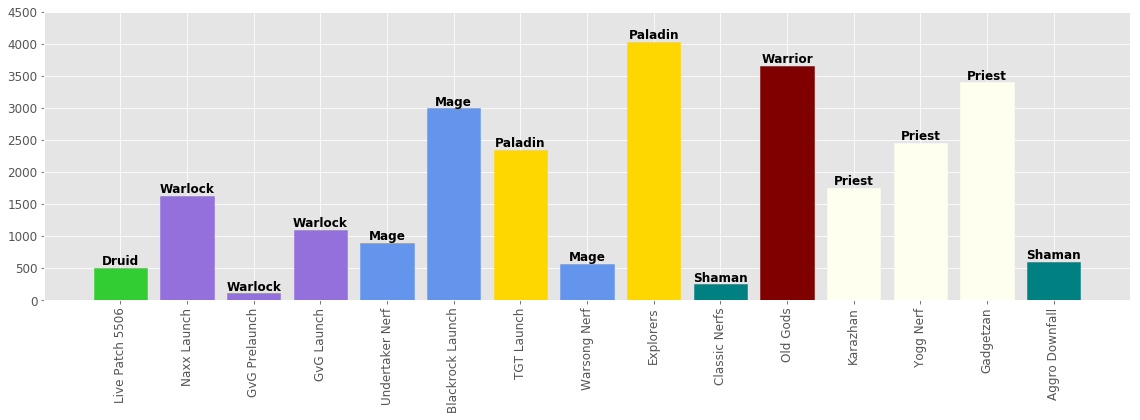

In [15]:
fig, ax = plt.subplots(figsize=(16,6))
i=0
for pair in class_max_name:
    patch = deck_set_event_list[i]
    deck_condit = ranked_decks['deck_class'] == pair[0]
    patch_condit = ranked_decks['deck_set'] == patch
    ax.bar(patch, pair[1])
    #ax.annotate('{}'.format(pair[0]), xy=(patch, pair[1]), weight="bold")
    i+=1
ax.set_xticks(np.arange(0, len(deck_set_event_list)))
ax.set_xticklabels(deck_set_event_list, rotation=90)
ax.set_ylim(0, 4500)
rects = ax.patches

labels = class_name_max
for rect, label in zip(rects, labels):
    rect.set_color(class_colors[label])
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', weight='bold')
plt.tight_layout()
plt.savefig('../img/most_popular_class_per_patch.png')

In [16]:
min_ls = []
for col in deck_set_event_list:
    min_ls.append(class_pop_df[col].min())
    
class_min = []
for idx, num in enumerate(min_ls):
    class_min.append(class_pop_df[class_pop_df[deck_set_event_list[idx]] == min_ls[idx]]['Class'])
    
class_min_name = []
for num in range(len(class_min)):
    class_min_name.append((class_min[num].all(), min_ls[num]))

class_min = [x[1] for x in class_min_name]
class_name_min = [x[0] for x in class_min_name]

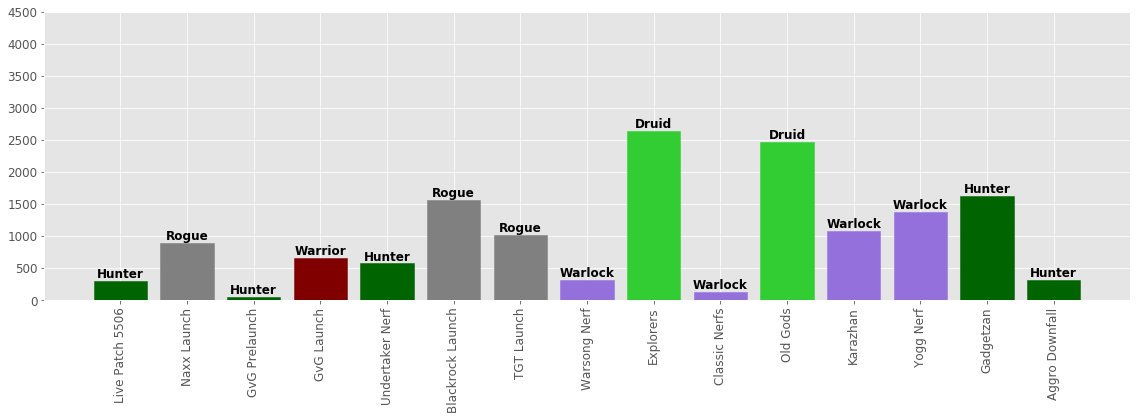

In [17]:
fig, ax = plt.subplots(figsize=(16,6))
i=0
for pair in class_min_name:
    patch = deck_set_event_list[i]
    deck_condit = ranked_decks['deck_class'] == pair[0]
    patch_condit = ranked_decks['deck_set'] == patch
    ax.bar(patch, height=pair[1])
    #ax.annotate('{}'.format(pair[0]), xy=(patch, pair[1]), weight="bold")
    i+=1
ax.set_xticks(np.arange(0, len(deck_set_event_list)))
ax.set_xticklabels(deck_set_event_list, rotation=90)
ax.set_ylim(0, 4500)
rects = ax.patches
labels = class_name_min
for rect, label in zip(rects, labels):
    rect.set_color(class_colors[label])
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', weight='bold')
plt.tight_layout()
plt.savefig('../img/least_popular_class_per_patch.png')

In [18]:
max_ls = []
for col in deck_set_event_list:
    max_ls.append(class_pop_df[col].max())

In [19]:
class_max = []
for idx, num in enumerate(max_ls):
    class_max.append(class_pop_df[class_pop_df[deck_set_event_list[idx]] == max_ls[idx]]['Class'])

In [20]:
class_max_name = []
for num in range(len(class_max)):
    class_max_name.append((class_max[num].all(), max_ls[num]))

In [21]:
deck_rating = []
for event in deck_set_event_list:
    deck_rating.append((event, ranked_decks[ranked_decks['deck_set'] == event]['rating'].max()))

In [22]:
deck_info_ls = []
for pair in deck_rating:
    rate_condit = ranked_decks['rating'] == pair[1]
    patch_condit = ranked_decks['deck_set'] == pair[0]
    deck_info_ls.append(ranked_decks[rate_condit & patch_condit])

In [23]:
deck_pop_title = []
for df in deck_info_ls:
    deck_pop_title.append(df['title'])

In [24]:
deck_pop_rate = []
for df in deck_info_ls:
    deck_pop_rate.append(df['rating'])

In [25]:
deck_pop_name = []
for num in range(len(deck_pop_title)):
    deck_pop_name.append((deck_pop_title[num].all(), deck_pop_rate[num].get_values()[0]))

In [26]:
deck_name = ['Crusher Shaman',
 'Midrange Hunter',
 'Handlock',
 'Mech Mage',
 "Mech Shaman",
 'Arcane Giant Patron OTK',
 'Midrange Totem Shaman',
 'Burst Rogue',
 "Dragonz'rilla",
 "C'Thun Druid",
 "C'thun priest",
 'Purify Priest',
 'Pirate Warrior',
 'Midrange Jade Lotus',
 'Jade Shaman']

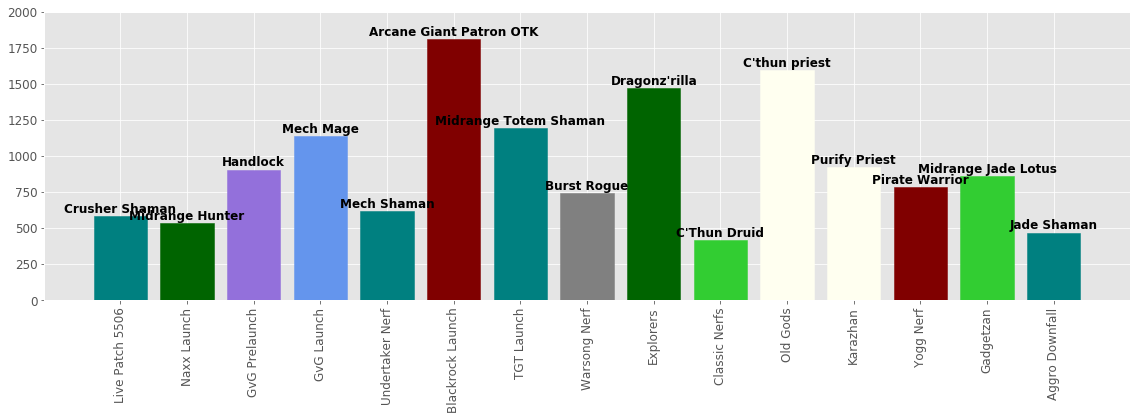

In [27]:
fig, ax = plt.subplots(figsize=(16,6))
i=0
for pair in deck_pop_name:
    patch = deck_set_event_list[i]
    ax.bar(patch, height=pair[1])
    i+=1
ax.set_xticks(np.arange(0, len(deck_set_event_list)))
ax.set_xticklabels(deck_set_event_list, rotation=90)
ax.set_ylim(0, 2000)
rects = ax.patches

labels = ['Shaman', 'Hunter', 'Warlock', 'Mage', 
          'Shaman', 'Warrior', 'Shaman', 'Rogue',
          'Hunter', 'Druid', 'Priest', 'Priest',
          'Warrior', 'Druid', 'Shaman']
i = 0
for rect, label in zip(rects, labels):
    rect.set_color(class_colors[label])
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, deck_name[i],
            ha='center', va='bottom', weight='bold')
    i += 1
plt.tight_layout()
plt.savefig('../img/most_popular_deck_per_patch.png')

In [28]:
ranked_submissions_month_2014 = ranked_decks_2014.groupby('month').agg({'title' : 'count'})
ranked_submissions_month_2015 = ranked_decks_2015.groupby('month').agg({'title' : 'count'})
ranked_submissions_month_2016 = ranked_decks_2016.groupby('month').agg({'title' : 'count'})
ranked_submissions_month_2017 = ranked_decks_2017.groupby('month').agg({'title' : 'count'})

In [29]:
arr_2014 = np.array(ranked_submissions_month_2014['title'])
arr_2015 = np.append(arr_2014, ranked_submissions_month_2015['title'])
arr_2016 = np.append(arr_2015, ranked_submissions_month_2016['title'])
arr_all = np.append(arr_2016, ranked_submissions_month_2017['title'])

In [30]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
         'September', 'October', 'November', 'December']
arr_ls = [arr_2014, arr_2015, arr_2016]

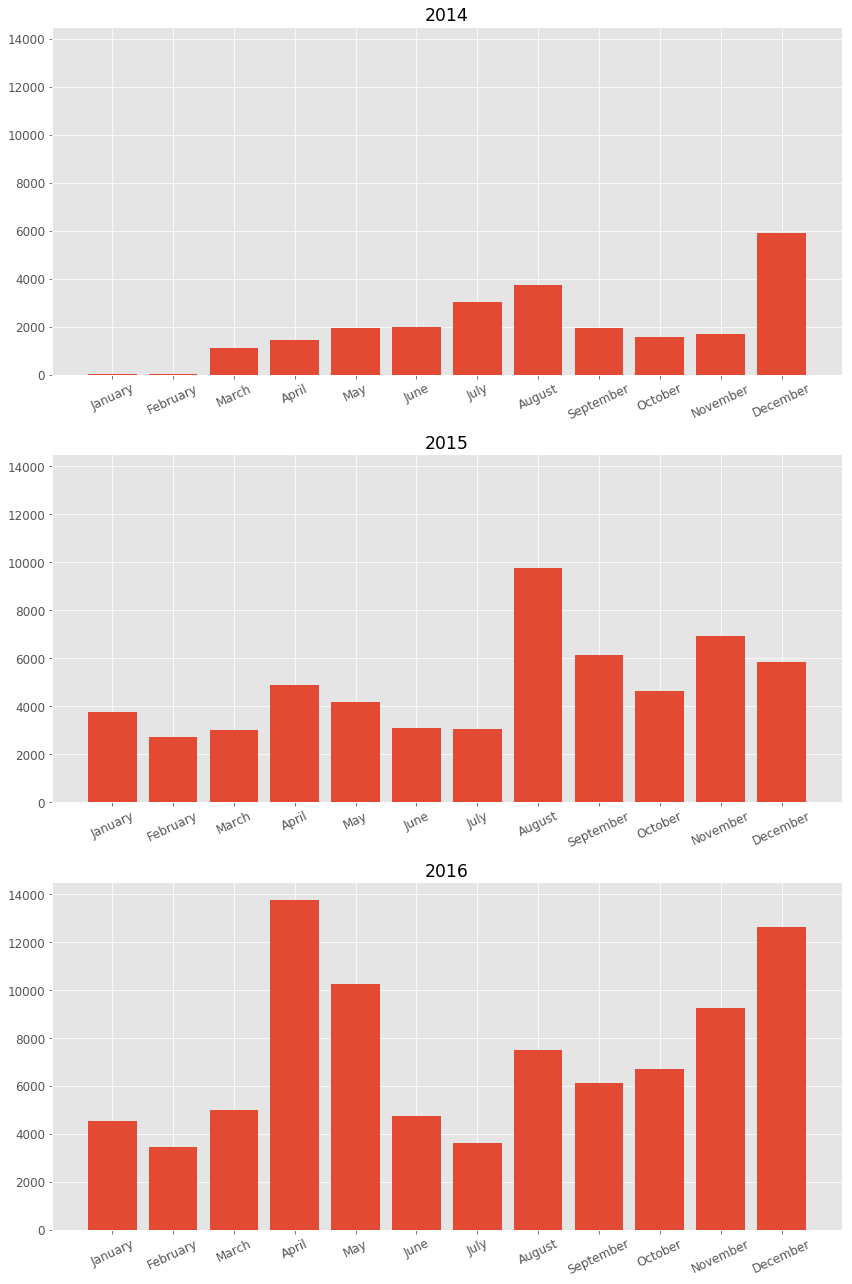

In [31]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
year = 4
for idx, ax in enumerate(axs.flatten()):
    ax.bar(months, arr_ls[idx][-12:])
    ax.set_xticks(np.arange(0, 12))
    ax.set_xticklabels(months, rotation=25)
    ax.set_title('201{}'.format(year))
    ax.set_ylim(0, 14500)
    year +=1
plt.tight_layout()
plt.savefig('../img/deck_uploads_per_year.png')

In [32]:
#img = plt.imread("img/hunter.png")
#implot = plt.imshow(img)
#plt.show()

In [33]:
set_uploads_df = ranked_decks.groupby('deck_set').agg({'title' : 'count'})

In [34]:
set_uploads_cols = set(set_uploads_df.index)

In [35]:
deck_set_event_set = set(deck_set_event_list)

In [36]:
removal_sets = set_uploads_cols.difference(deck_set_event_set)

In [37]:
set_uploads_df.drop(removal_sets, inplace=True)

In [38]:
set_uploads_ls = []
for event in deck_set_event_list:
    set_uploads_ls.append(set_uploads_df.title[event])

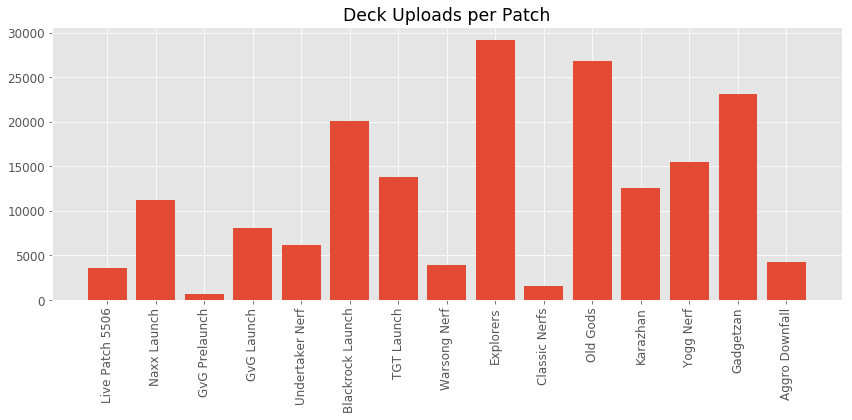

In [39]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(deck_set_event_list, set_uploads_ls)
ax.set_xticks(np.arange(0, len(deck_set_event_list)))
ax.set_xticklabels(deck_set_event_list, rotation=90)
ax.set_title("Deck Uploads per Patch")
plt.tight_layout()
plt.savefig('../img/deck_uploads_per_patch.png')

In [40]:
ls = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
      1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
      1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
      1, 2, 3]
months = {1 : 'January', 2 : 'February', 3 : 'March', 4 : 'April', 5 : 'May', 6 : 'June', 7 : 'July', 8 : 'August',
         9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December'}

In [41]:
month_names = [months[x] for x in ls]

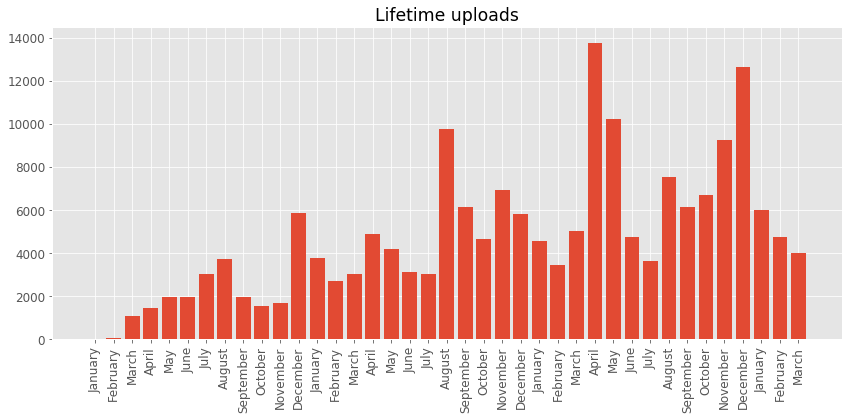

In [42]:
num_months = np.arange(1, 40)

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(num_months, arr_all)
ax.set_xticks(np.arange(1, 40))
ax.set_xticklabels(month_names, rotation=90)
ax.set_title('Lifetime uploads')
ax.set_ylim(0, 14500)
plt.tight_layout()
plt.savefig('../img/deck_uploads_all_time.png')

In [43]:
deck_set_event_dict = {#'Beta Release', 'Beta Patch 3664', 'Beta Patch 3749', 'Beta Patch 3937',
                       #'Beta Patch 4217', 'Beta Patch 4243', 'Beta Patch 4482', 'Beta Patch 4944',
                       #'Live Patch 4973', 'Live Patch 5170', 'Live Patch 5435', 
                       'Live Patch 5506' : 3,
                       'Naxx Launch' : 7, 'GvG Prelaunch' : 11, 'GvG Launch' : 12, 'Undertaker Nerf' : 13, 
                       'Blackrock Launch' : 16, 'TGT Launch' : 21, 'Warsong Nerf' : 22, 'Explorers' : 23, 
                       'Classic Nerfs' : 28, 'Old Gods' : 29, 'Karazhan' : 32, 'Yogg Nerf' : 34,
                       'Gadgetzan' : 36, 'Aggro Downfall' : 38
                      }

In [44]:
deck_set_event_pop = {#'Beta Release', 'Beta Patch 3664', 'Beta Patch 3749', 'Beta Patch 3937',
                       #'Beta Patch 4217', 'Beta Patch 4243', 'Beta Patch 4482', 'Beta Patch 4944',
                       #'Live Patch 4973', 'Live Patch 5170', 'Live Patch 5435', 
                       'Live Patch 5506' : 3611,
                       'Naxx Launch' : 11223, 'GvG Prelaunch' : 673, 'GvG Launch' : 8067, 'Undertaker Nerf' : 6177, 
                       'Blackrock Launch' : 20048, 'TGT Launch' : 13803, 'Warsong Nerf' : 3893, 'Explorers' : 29212, 
                       'Classic Nerfs' : 1588, 'Old Gods' : 26798, 'Karazhan' : 12524, 'Yogg Nerf' : 15540,
                       'Gadgetzan' : 23135, 'Aggro Downfall' : 4254
                      }

In [45]:
deck_set_event_dict_invert = {}
for key, value in deck_set_event_dict.items():
     deck_set_event_dict_invert[value] = key

In [46]:
uploads_df = pd.DataFrame(deck_set_event_dict_invert, index=np.arange(0, 2))

In [47]:
for num in range(1, 40):
    if num not in uploads_df.columns:
        uploads_df[num] = None

In [48]:
for num in range(0, 38):
    uploads_df.loc[1, num+1] = arr_all[num]

In [49]:
uploads_df.fillna(0, inplace=True)

In [50]:
patch_full_ls = []
for col in uploads_df.columns.sort_values():
    if uploads_df.loc[0, col] == 0:
        patch_full_ls.append(0)
    else:
        patch_full_ls.append(uploads_df.loc[0, col])

In [51]:
for i in range(len(patch_full_ls)):
    if patch_full_ls[i] != 0:
        patch_full_ls[i] = deck_set_event_pop[patch_full_ls[i]]

In [52]:
num_months = list(np.arange(1, 40))
num_months_num = list(np.arange(1, 40))

In [53]:
for key in deck_set_event_dict_invert.keys():
    num_months[key-1] = deck_set_event_dict_invert[key]

In [54]:
num_months[10] = 0
num_months[27] = 0
num_months[21] = 0

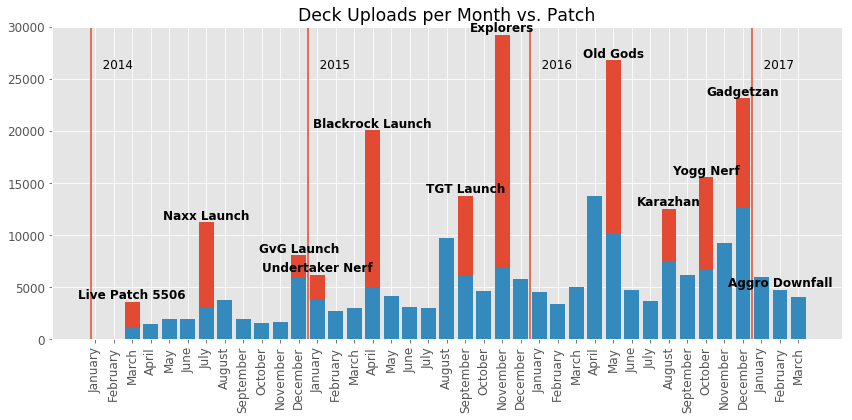

In [55]:
fig, ax = plt.subplots(figsize=(12, 6))


ax.bar(num_months_num, patch_full_ls)
ax.bar(num_months_num, arr_all)
ax.set_xticks(np.arange(1, 40))
ax.set_xticklabels(month_names, rotation=90)
ax.set_title('Deck Uploads per Month vs. Patch')
ax.set_ylim(0, 30000)
ax.axvline(0.75)
ax.axvline(12.5)
ax.axvline(24.5)
ax.axvline(36.5)
ax.text(0.75, 26000, "   2014")
ax.text(12.5, 26000, "   2015")
ax.text(24.5, 26000, "   2016")
ax.text(36.5, 26000, "   2017")

rects = ax.patches

labels = num_months
for rect, label in zip(rects, labels):
    height = rect.get_height()
    if type(label) == str:
        if label == "Aggro Downfall":
            ax.text(rect.get_x() + rect.get_width() / 2, height + 525, label, ha='center', va='bottom', weight='bold')
        else:
            ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha='center', va='bottom', weight='bold')
plt.tight_layout()
plt.savefig('../img/month_versus_patch.png')

In [56]:
broken_ids = {836.0: 836.0, 137.0: 836.0, 253.0: 836.0,
 1681.0: 692.0, 38319.0: 692.0, 1682.0: 692.0, 692.0: 692.0,
 19292.0: 1929.0, 38710.0: 1929.0, 1929.0: 1929.0,
 2466.0: 2261.0, 2380.0: 2261.0, 41609.0: 2261.0, 2430.0: 2261.0,
 45369.0: 2261.0, 2652.0: 2261.0, 2558.0: 2261.0, 40259.0: 2261.0, 2261.0: 2261.0,
 13335.0: 13335.0, 38112.0: 13335.0, 38113.0: 13335.0,
 86.0: 86.0, 1161.0: 86.0, 928.0: 86.0,
 41408.0: 40372.0, 40372.0: 40372.0, 41409.0: 40372.0,
 2292.0: 2292.0, 2311.0: 2292.0, 38320.0: 2292.0, 2310.0: 2292.0,
 40402.0: 38266.0, 38266.0: 38266.0,
 42146.0: 40953.0, 40953.0: 40953.0, 42213.0: 40953.0,
 40341.0: 940.0, 40352.0: 940.0, 940.0: 940.0,
 690.0: 151.0, 276.0: 151.0, 322.0: 151.0, 468.0: 151.0, 151.0: 151.0,
 2048.0: 2048.0, 2230.0: 2048.0,
 179.0: 179.0, 38653.0: 179.0,
 2178.0: 2009.0, 2009.0: 2009.0, 2177.0: 2009.0, 2176.0: 2009.0}

In [57]:
standard_decks = ranked_decks[ranked_decks['deck_format'] == 'S']

In [58]:
card_appearance_dict = {}
prev_id = 0
for tup in standard_decks['card_list']:
    for dbfid in tup:
        if dbfid != prev_id:
            #if dbfid in broken_ids.keys():
                #dbfid = broken_ids[dbfid]
            if dbfid not in card_appearance_dict.keys():
                card_appearance_dict[dbfid] = 1
            else:
                card_appearance_dict[dbfid] += 1
        prev_id = dbfid

In [59]:
wild_card_appearance_dict = {}
prev_id = 0
for tup in ranked_decks['card_list']:
    for dbfid in tup:
        if dbfid != prev_id:
            #if dbfid in broken_ids.keys():
                #dbfid = broken_ids[dbfid]
            if dbfid not in wild_card_appearance_dict.keys():
                wild_card_appearance_dict[dbfid] = 1
            else:
                wild_card_appearance_dict[dbfid] += 1
        prev_id = dbfid

In [60]:
wild_card_tup_ls = [(dbfid, count) for dbfid, count in wild_card_appearance_dict.items()]

In [61]:
card_tup_ls = [(dbfid, count) for dbfid, count in card_appearance_dict.items()]

In [62]:
sorted_standard = sorted(card_appearance_dict.items(), key=lambda kv: kv[1], reverse=True)

In [63]:
sorted_wild = sorted(wild_card_appearance_dict.items(), key=lambda kv: kv[1], reverse=True)

In [64]:
standard_x = [json_df[json_df['dbfId'] == x[0]]['name'].any() for x in sorted_standard[:50]]
standard_y = [x[1] for x in sorted_standard[:50]]

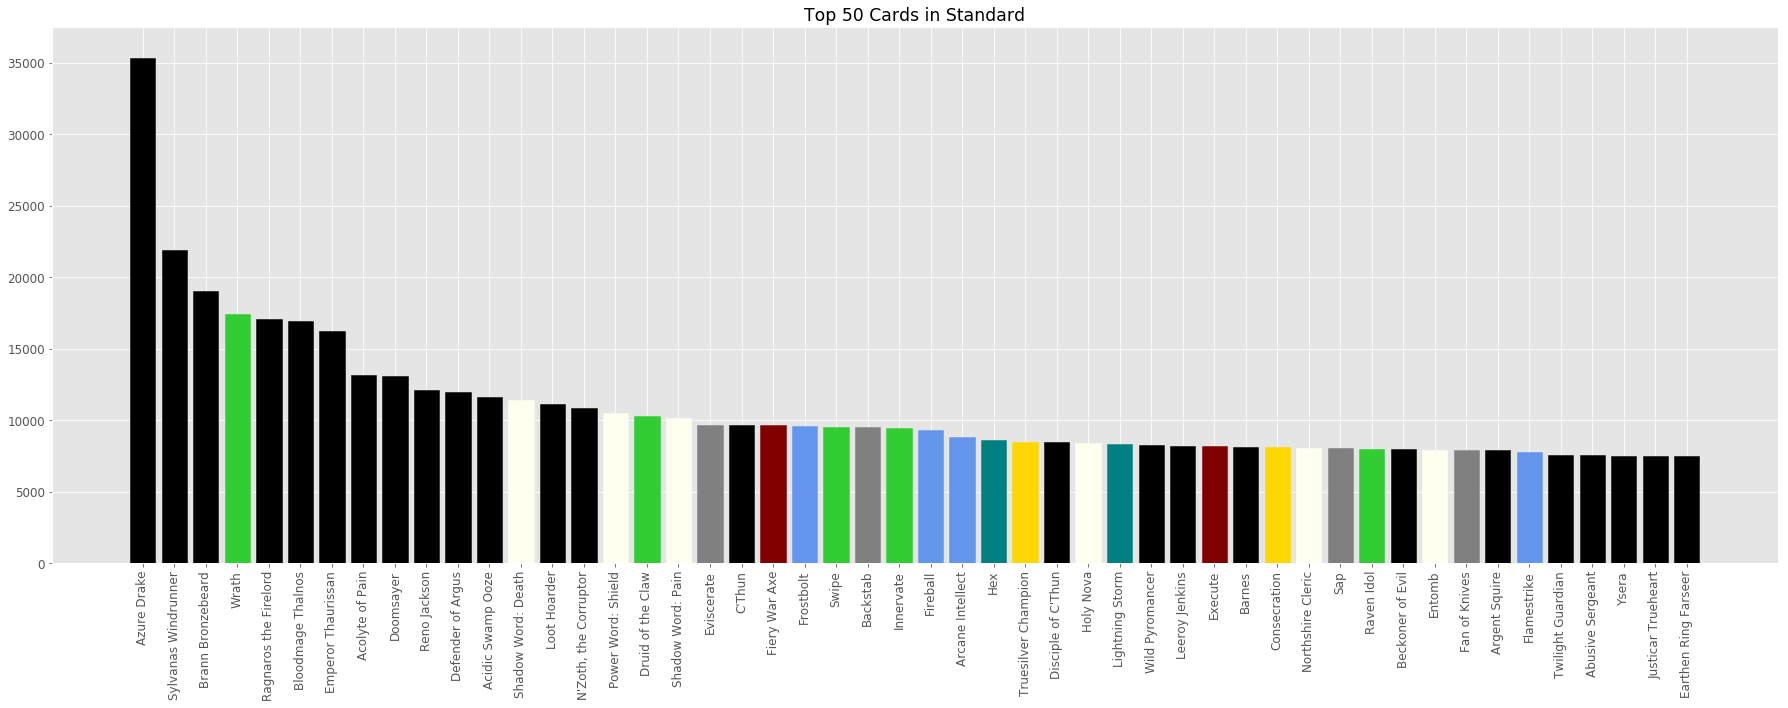

In [65]:
fig, ax = plt.subplots(figsize=(25, 10))

ax.bar(np.arange(0, len(standard_x)), standard_y)
ax.set_xticks(np.arange(0, len(standard_x)))
ax.set_xticklabels(standard_x, rotation=90)
ax.set_title('Top 50 Cards in Standard')
ax.set_ylim(0, 37500)
rects = ax.patches
labels = standard_x
for rect, label in zip(rects, labels):
    card_class = json_df[json_df['name'] == label]['cardClass'].any()
    rect.set_color(class_colors[card_class.lower().capitalize()])
plt.tight_layout()
plt.savefig("../img/standard_card_representation_total")

In [66]:
decks_s = standard_decks.shape[0]
standard_y_perc = [x/decks_s for x in standard_y]

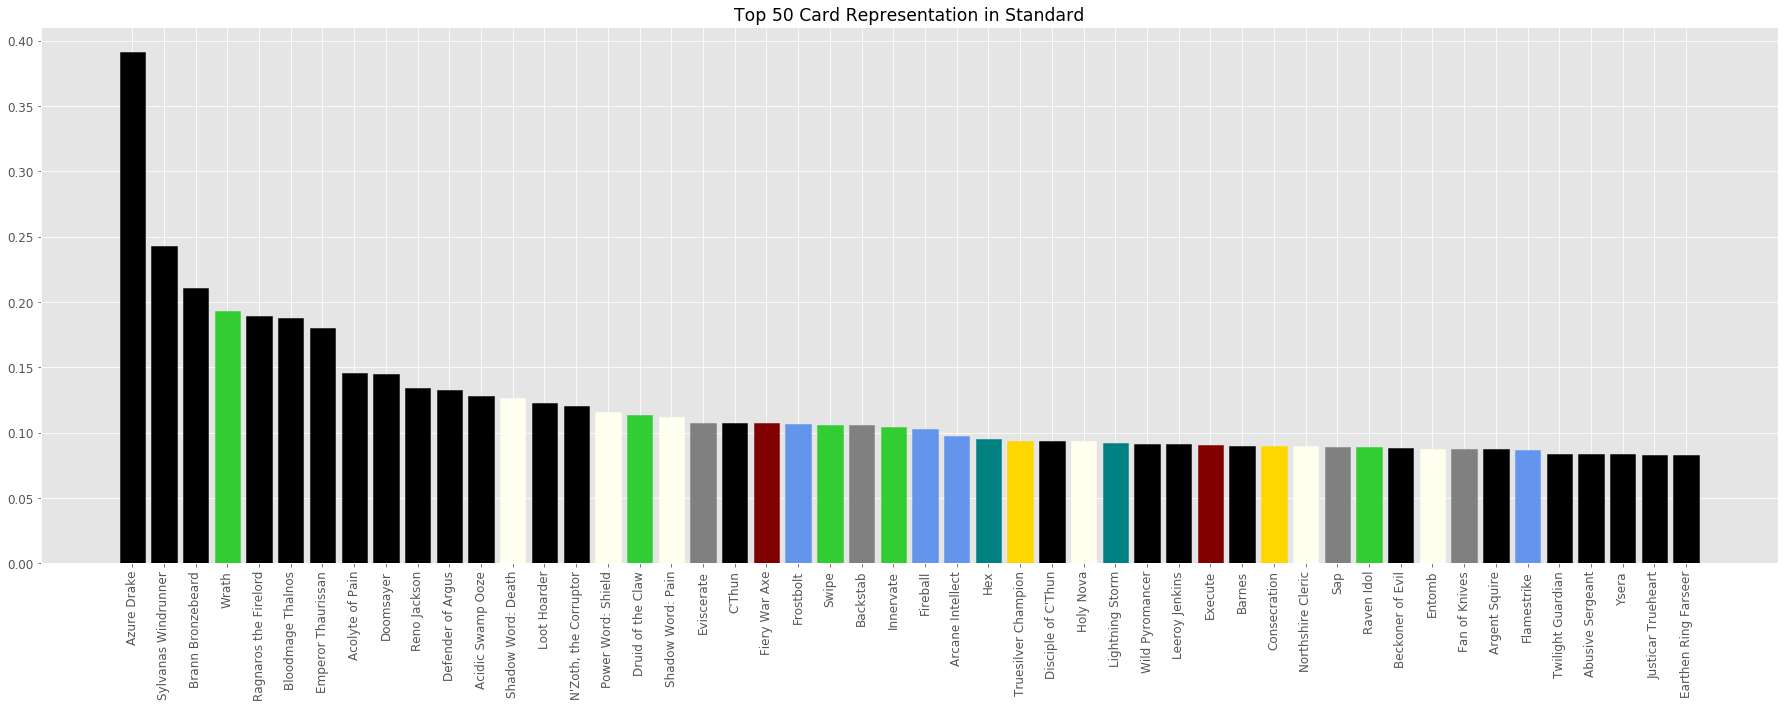

In [67]:
fig, ax = plt.subplots(figsize=(25, 10))

ax.bar(np.arange(0, len(standard_x)), standard_y_perc)
ax.set_xticks(np.arange(0, len(standard_x)))
ax.set_xticklabels(standard_x, rotation=90)
ax.set_title('Top 50 Card Representation in Standard')
rects = ax.patches
labels = standard_x
for rect, label in zip(rects, labels):
    card_class = json_df[json_df['name'] == label]['cardClass'].any()
    rect.set_color(class_colors[card_class.lower().capitalize()])
plt.tight_layout()
plt.savefig("../img/standard_card_representation")

In [68]:
wild_x = [json_df[json_df['dbfId'] == x[0]]['name'].any() for x in sorted_wild[:50]]
wild_y = [x[1] for x in sorted_wild[:50]]

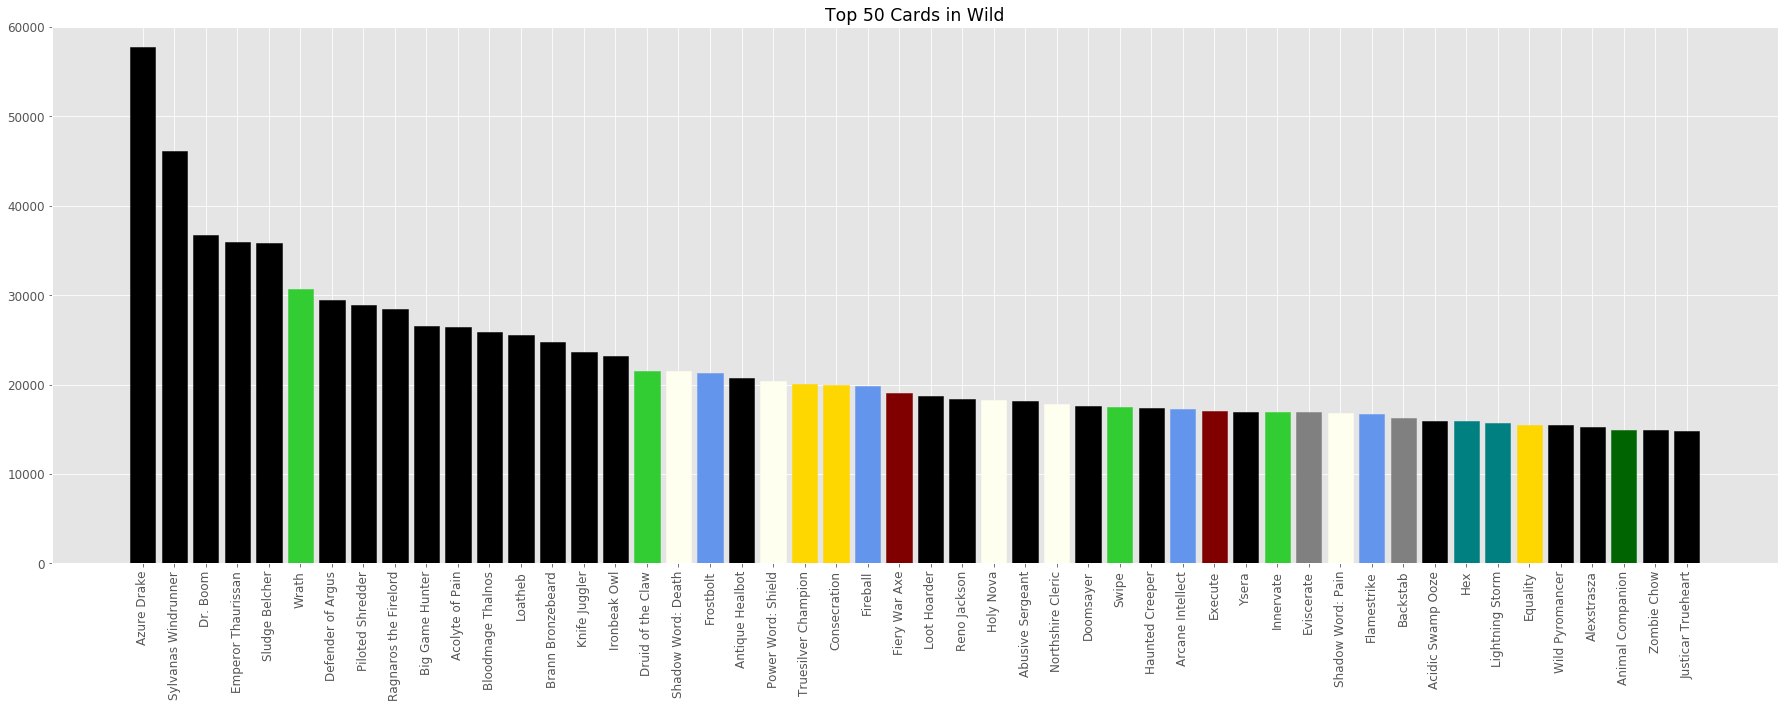

In [69]:
fig, ax = plt.subplots(figsize=(25, 10))

ax.bar(np.arange(0, len(wild_x)), wild_y)
ax.set_xticks(np.arange(0, len(wild_x)))
ax.set_xticklabels(wild_x, rotation=90)
ax.set_title('Top 50 Cards in Wild')
ax.set_ylim(0, 60000)
rects = ax.patches
labels = wild_x
for rect, label in zip(rects, labels):
    card_class = json_df[json_df['name'] == label]['cardClass'].any()
    rect.set_color(class_colors[card_class.lower().capitalize()])
plt.tight_layout()
plt.savefig("../img/wild_card_representation_total")

In [70]:
decks_w = ranked_decks.shape[0]
wild_y_perc = [x/decks_w for x in wild_y]

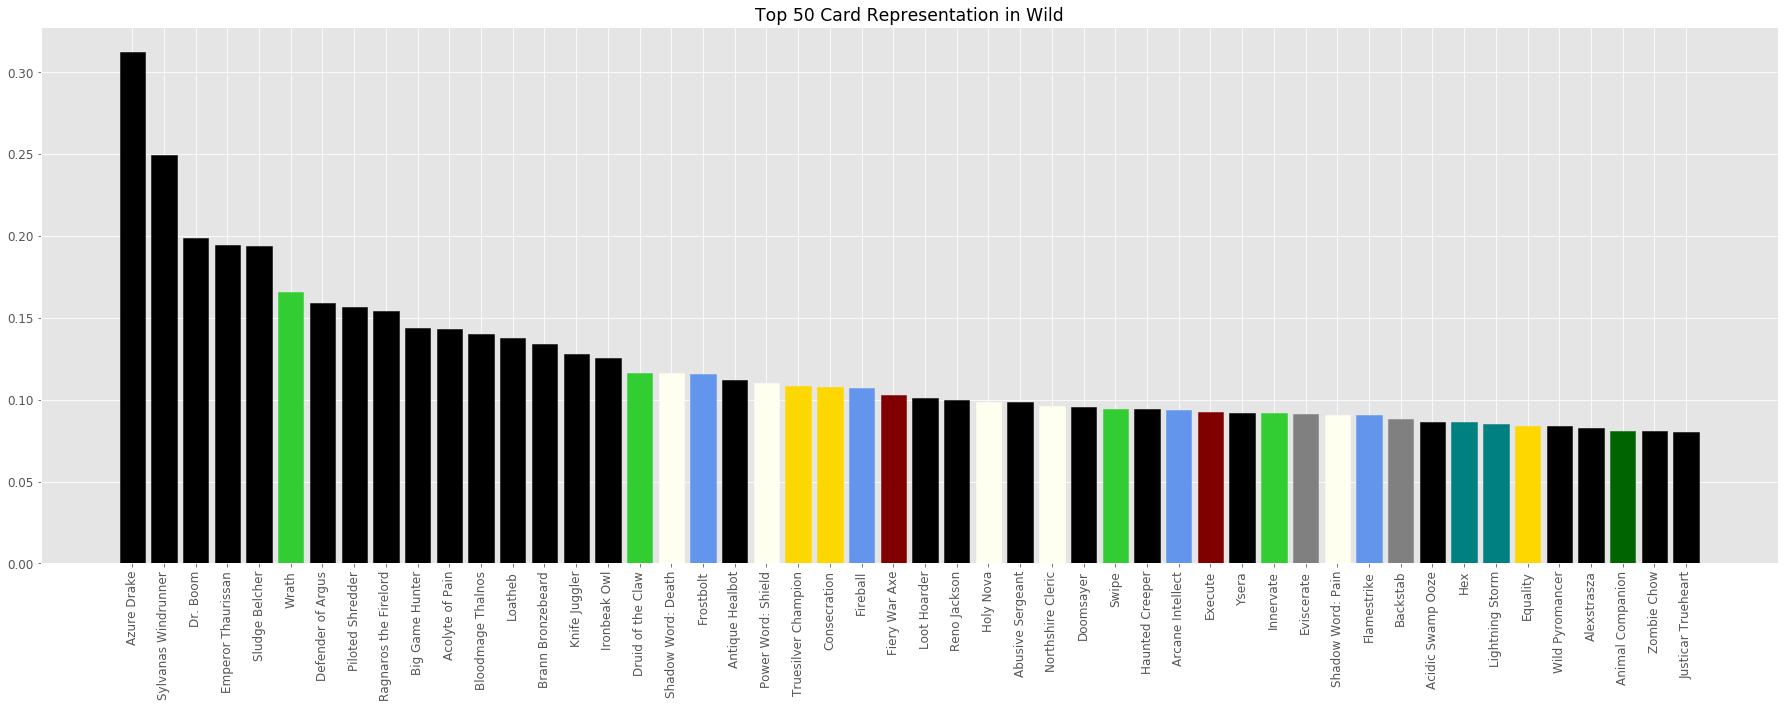

In [71]:
fig, ax = plt.subplots(figsize=(25, 10))

ax.bar(np.arange(0, len(wild_x)), wild_y_perc)
ax.set_xticks(np.arange(0, len(wild_x)))
ax.set_xticklabels(wild_x, rotation=90)
ax.set_title('Top 50 Card Representation in Wild')

rects = ax.patches
labels = wild_x
for rect, label in zip(rects, labels):
    card_class = json_df[json_df['name'] == label]['cardClass'].any()
    rect.set_color(class_colors[card_class.lower().capitalize()])
plt.tight_layout()
plt.savefig("../img/wild_card_representation")

In [72]:
def get_class_top_10(cls_str='Neutral', mode = 'W'):
    class_df = ranked_decks[ranked_decks['deck_class'] == cls_str.lower().capitalize()]
    cls_appearance_dict = {}
    prev_id = 0
    for tup in class_df['card_list']:
        for dbfid in tup:
            if dbfid != prev_id:
                #if dbfid in broken_ids.keys():
                    #dbfid = broken_ids[dbfid]
                if dbfid not in cls_appearance_dict.keys():
                    cls_appearance_dict[dbfid] = 1
                else:
                    cls_appearance_dict[dbfid] += 1
            prev_id = dbfid
    sorted_class = sorted(cls_appearance_dict.items(), key=lambda kv: kv[1], reverse=True)
    decks = class_df.shape[0]
    class_x = [json_df[json_df['dbfId'] == x[0]]['name'].any() for x in sorted_class[:10]]
    class_y = [x[1]/decks for x in sorted_class[:10]]
    return class_x, class_y

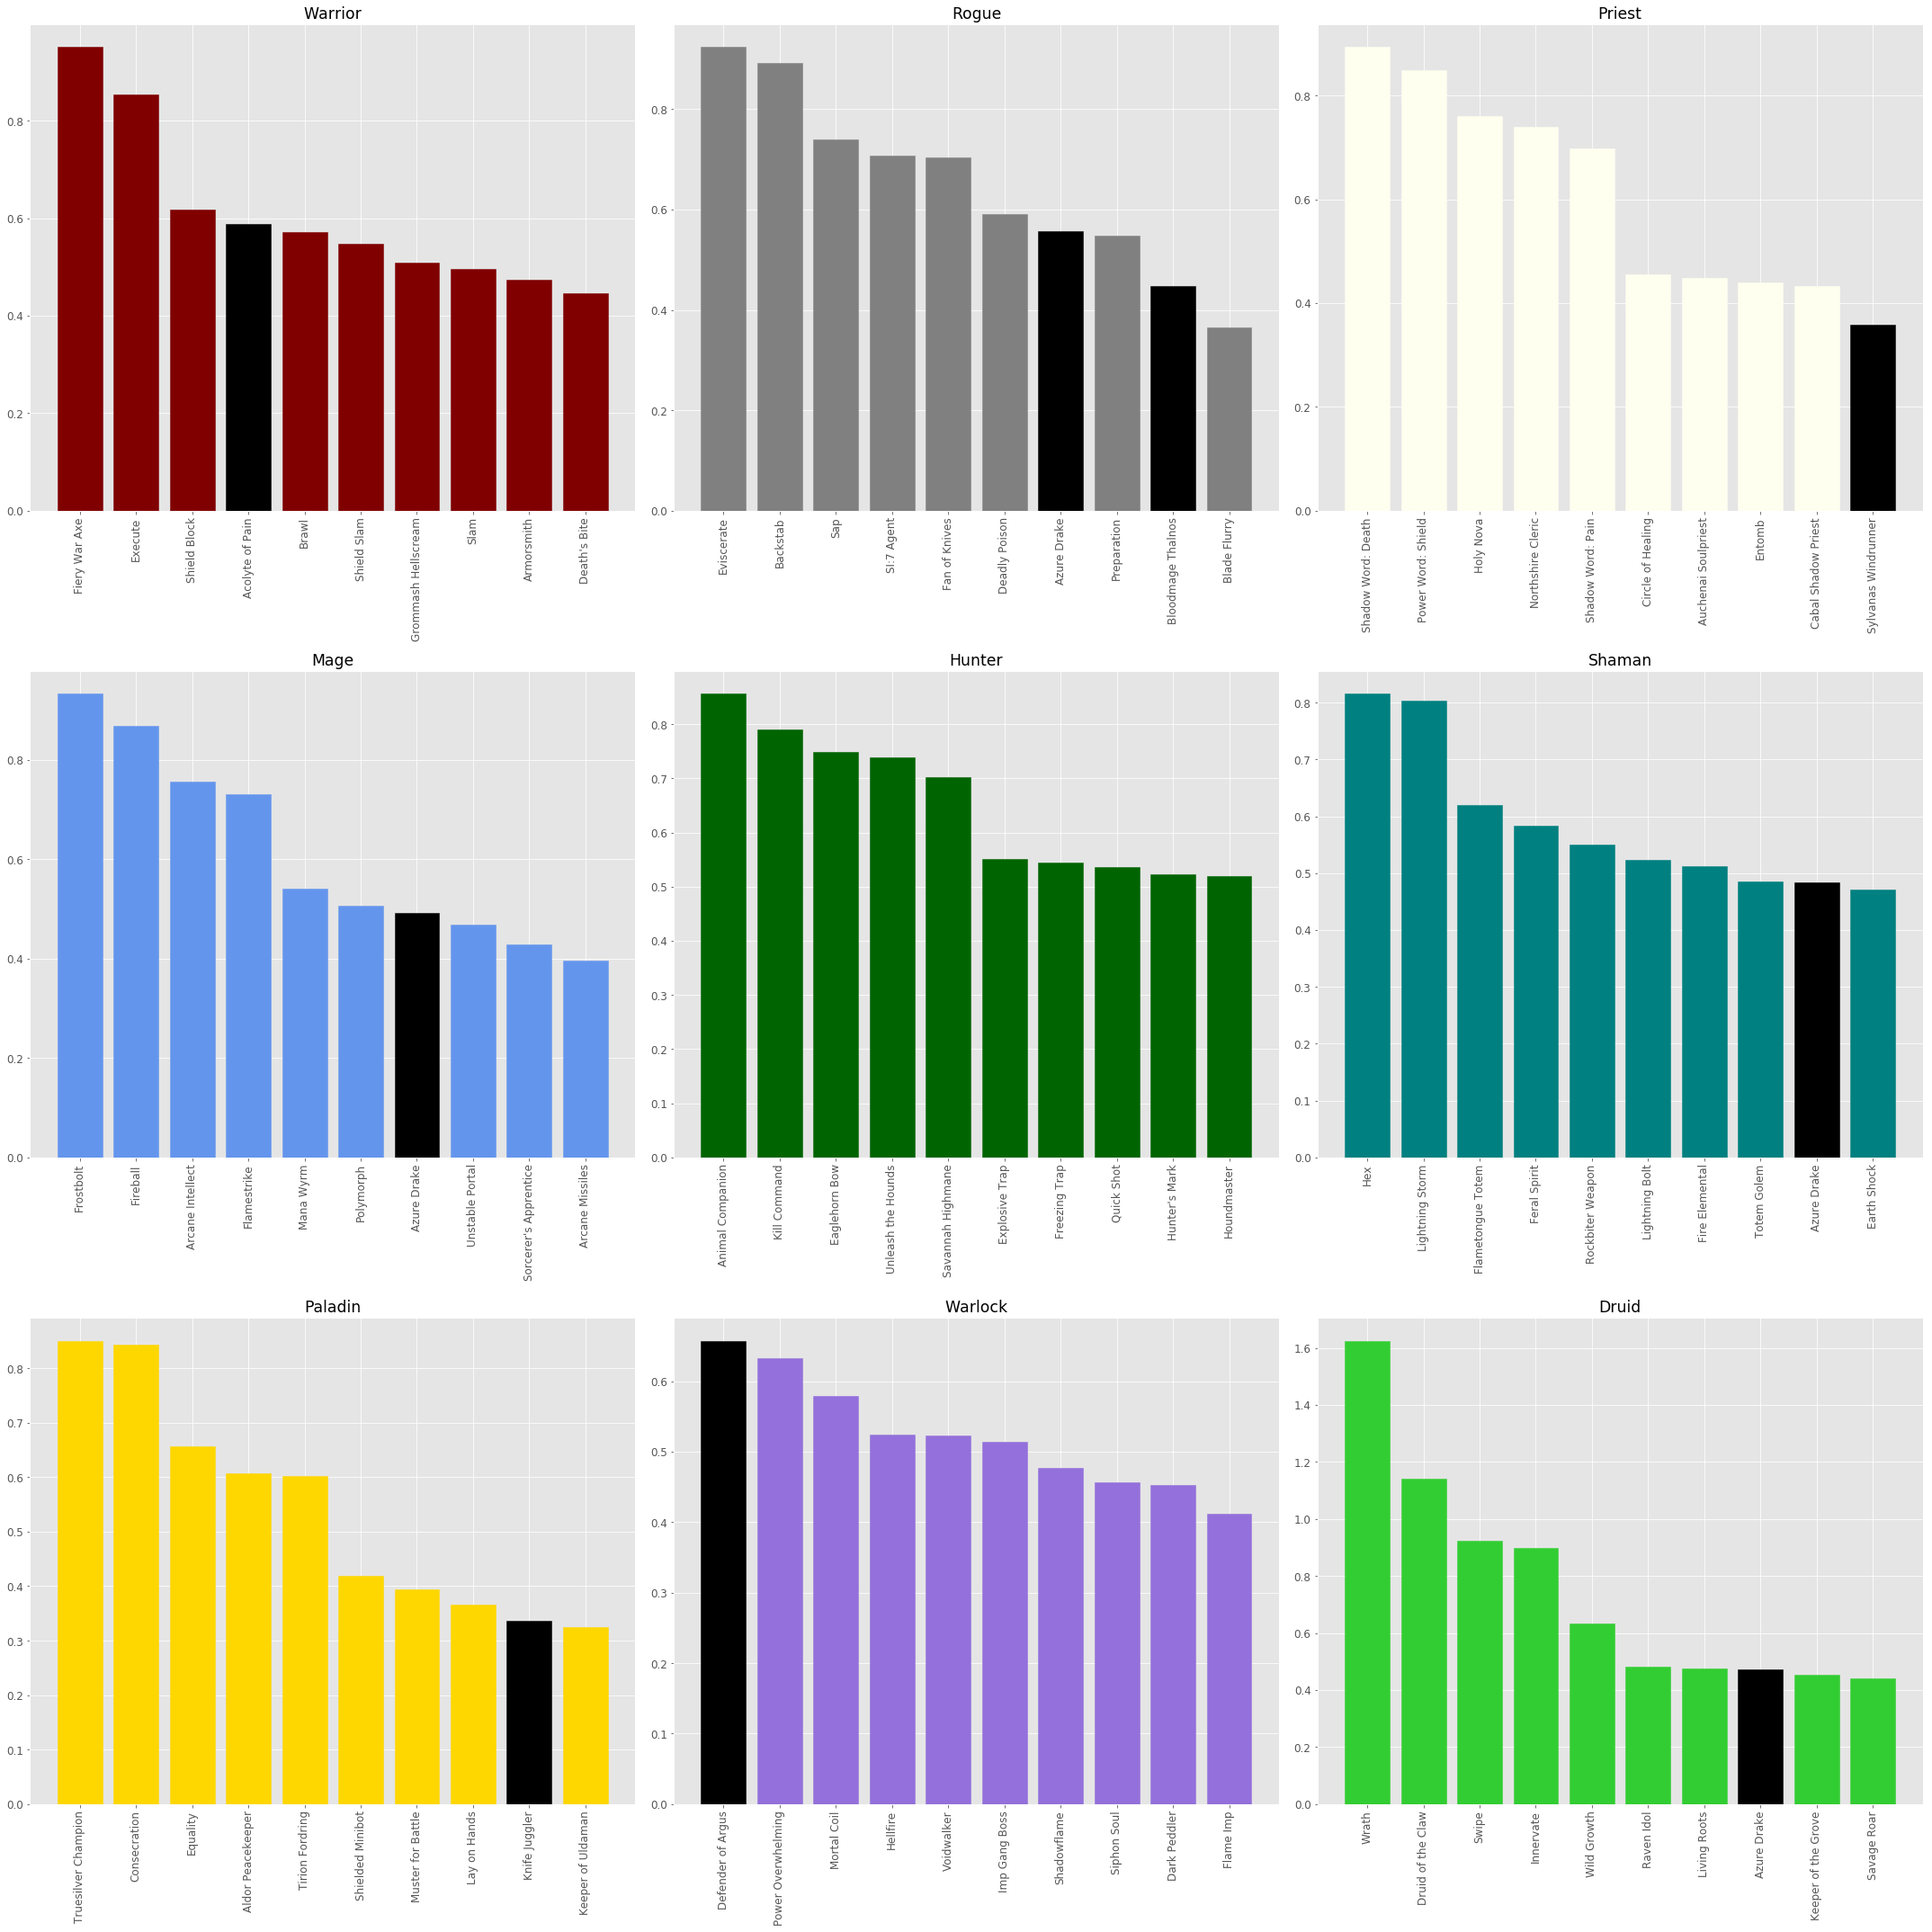

In [73]:
fig, axs = plt.subplots(3, 3, figsize=(30, 30))

for idx, ax in enumerate(axs.flatten()):
    cls = class_names[idx]
    cls_x, cls_y = get_class_top_10(cls)
    ax.bar(np.arange(0, len(cls_x)), cls_y)
    ax.set_xticks(np.arange(0, len(cls_x)))
    ax.set_xticklabels(cls_x, rotation=90)
    ax.set_title(cls)
    rects = ax.patches
    labels = cls_x
    for rect, label in zip(rects, labels):
        card_class = json_df[json_df['name'] == label]['cardClass'].any()
        rect.set_color(class_colors[card_class.lower().capitalize()])
plt.tight_layout()
plt.savefig("../img/class_card_representation")